## Цель работы:

Изучение связи между признаками двумерного набора данных, визуализация данных.

**Вариант:** 16 (6-ой лист из regression.xlsx)

## Ход работы
### Часть 1
### Простая линейная регрессия
Перед началом основной работы были заданы все основные массивы данных

In [1]:
import numpy as np
import pandas as pd

df = pd.read_excel('regression.xlsx')

x1 = np.array(df['x1'])
x2 = np.array(df['x2'])
y = np.array(df['y'])

После этого было произведено разбиение исходных данных на тренировочный и валидационный наборы при помощи команды `train_test_split`


In [2]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(x1, y, test_size=0.25, random_state=12)


Были получены значения для выполнения первой части - значения для x1 и y. Далее было сформировано 4 набора данных - наборы тренировочные и валидационные по x и по y. Параметр test_size указывал разделение полученных наборов - в данном случае 25% ушло на валидационный, остальное - на тренировку. Параметр random_state указывал количество перемешиваний датасета перед его разделением.

Далее была создана модель парной регрессии, после чего полученные значения в сравнении с валидационными были помещены в датафрейм и выведены. Также были посчитаны метрики оценки качества регрессии - MAE, MSE, RMSE, R2.

Mean Squared Error (MSE) позволяет оценить, насколько сильно модель отклоняется от истинных значений целевой переменной. Чем меньше значение MSE, тем более точно модель предсказывает значения. Однако, MSE имеет особенность оптимизировать ошибки в среднем, что может привести к недопониманию экстремальных значений или выбросов.

Mean Absolute Error (MAE): среднее абсолютное значение ( средняя абсолютная ошибка)


Root Mean Squared Error (RMSE): квадратный корень из среднего квадрата ошибок (MSE).


R-squared (R2): Коэффициент детерминации R2 – метрика, которую нужно максимизировать, определяет долю изменений, обусловленных влиянием признаков на целевую переменную

Метрика MAE более устойчива к выбросам, чем RMSE, поэтому если важно, чтобы ошибки на всех объектах были примерно равны, то используется RMSE при обучении, а если важно достичь меньших ошибок на большинстве объектов, при этом выбросы допустимы, то лучше использовать MAE. В целом выбор метрик часто зависит от задачи.

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

model = LinearRegression().fit(np.array(X_train).reshape(-1,1), y_train)
predictions_valid = model.predict(np.array(X_valid).reshape(-1,1))
df_match = pd.DataFrame({'actual': y_valid, 'predicted': predictions_valid })

print('Mean Absolute Error:', mean_absolute_error(y_valid, predictions_valid))
print('Mean Squared Error:', mean_squared_error(y_valid, predictions_valid))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_valid, predictions_valid)))
print('R2 metric:', r2_score(y_valid, predictions_valid))
print('Предсказание:')
print(df_match.reset_index(drop=True))

Mean Absolute Error: 1.2986695343338246
Mean Squared Error: 2.5741749584361338
Root Mean Squared Error: 1.604423559549078
R2 metric: -0.0011340256842993224
Предсказание:
       actual  predicted
0    4.169405   1.374430
1    0.765521   1.337560
2    1.305874   1.363668
3    0.128607   1.339686
4   -0.190868   1.349520
..        ...        ...
245  1.097299   1.338603
246  0.521051   1.349831
247  1.051549   1.346510
248  1.248375   1.345192
249  1.624147   1.353287

[250 rows x 2 columns]


С помощью библиотеки sklearn были вычислены различные параметры, определяющие качество регрессии. Основным параметром явнялется R2. В результате вычисления метрики еоэффициента детерминации можно заметить, что она получилась равна -0.001134. Это говорит о том, что модель линейной регрессии является очень плохой в данной ситуации.

Затем были выведены коэффициенты линейной регрессии `a` и `b`

In [4]:
a = model.coef_
b = model.intercept_

print("Коэффициент a:", *a)
print("Коэффициент b:", b)

Коэффициент a: 0.013408325534175954
Коэффициент b: 1.3502845805531176


После чего была произведена визуализация регрессии. Для этого на одном графике были отображены линия предсказания, а также реальные значения.

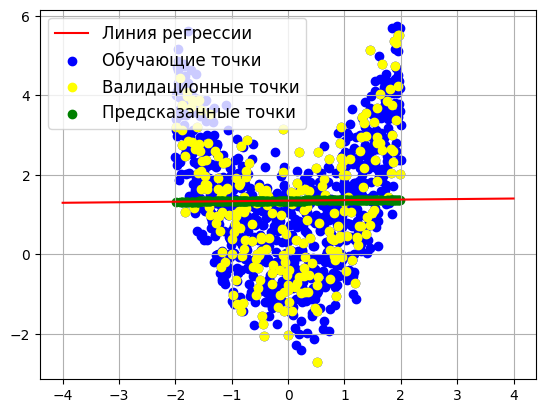

In [5]:
import matplotlib.pyplot as plt

plt.plot([-4, 4],  [a*-4 + b, a*4 + b], color='red', label="Линия регрессии")
plt.scatter(x1, y, color='blue', label='Обучающие точки')
plt.scatter(X_valid, y_valid, color='yellow', label='Валидационные точки')
plt.scatter(X_valid, predictions_valid, color='green', label='Предсказанные точки')


plt.grid()
plt.legend(fontsize=12, loc='best')

Была построена линейная зависимость по параметрам полученной модели: коэффициента и свободного члена. Был выбран промежуток х от -4 до 4. Можно заметить, что, линейная регрессия точно не может описать данную зависимость. Синие точки - группа обучения. <br><br>


Для лучшего анализа полученных результатов можно построить график остатков, который покажет разницу между предсказанным и настоящим значением.

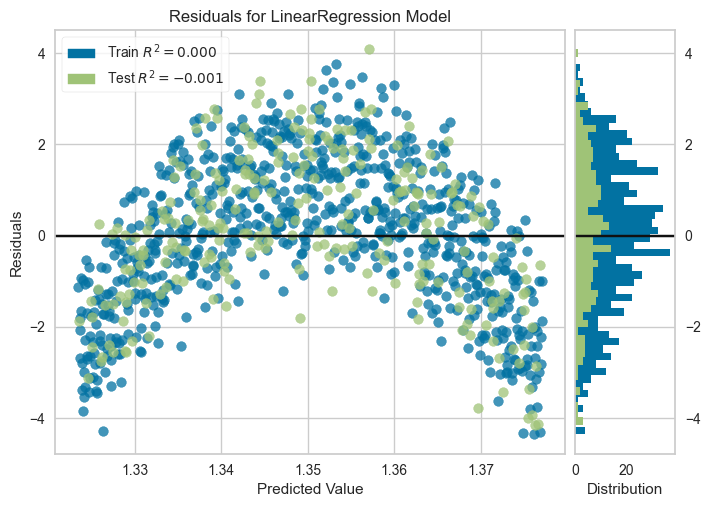

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [6]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(model)

visualizer.fit(np.array(X_train).reshape(-1,1), y_train)  # обучающие данные
visualizer.score(np.array(X_valid).reshape(-1,1), y_valid) # Оценка модели по тестовым данных
visualizer.show()                 # Визуализация

График разницы между предсказанными и истинными значениями показал, насколько отличались предсказанные значения от изначальных. Разница между предсказанными и настоящими значениями были значительными, что можно было заметить и по метрике R2. <br><br>

Далее была построена диаграмма, на которой линей заданы значения реальных y, а также нарисованы точки, которые показывали предсказанные значения. Чем точка была ближе к красной прямой, тем более точно была предскзаана точка к ее истинному значению.

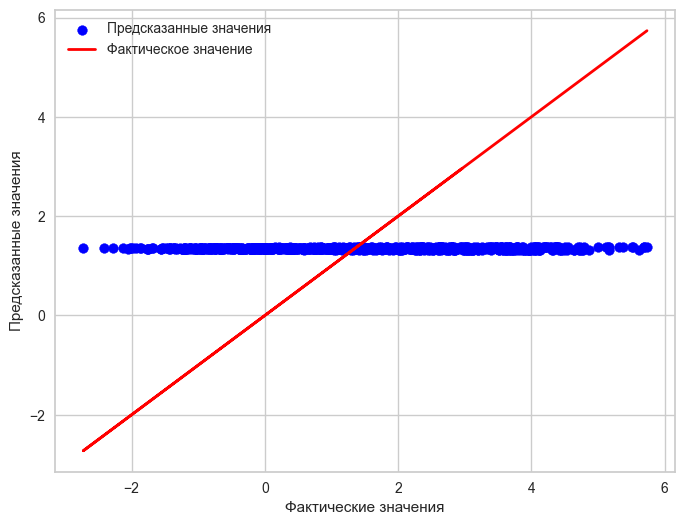

In [7]:
dpredictions_valid = model.predict(np.array(x1).reshape(-1,1))
plt.figure(figsize=(8, 6))
plt.scatter(y, dpredictions_valid, color='blue', label='Предсказанные значения')

plt.plot(y, y,  color='red', lw=2, label='Фактическое значение')

plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.legend(loc='upper left')

plt.show()

Полученный график показал, что полученная регрессия действительно проходит
очень далеко от значений точек. Что говорит о полном несоответсвии предсказания и фактических значений

---

Анлогичные действия были провеены и для x2

In [8]:
X2_train, X2_valid, y2_train, y2_valid = train_test_split(x2, y, test_size=0.25, random_state=12)


Набор данных был также разделен в соотношении 75 на 25. После чего были выполнены вычисления метрик для линейной регрессии по данному набору

In [9]:
model = LinearRegression().fit(np.array(X2_train).reshape(-1,1), y_train)
predictions_valid = model.predict(np.array(X2_valid).reshape(-1,1))
df_match = pd.DataFrame({'actual': y2_valid, 'predicted': predictions_valid })

print('Mean Absolute Error:', mean_absolute_error(y2_valid, predictions_valid))
print('Mean Squared Error:', mean_squared_error(y2_valid, predictions_valid))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y2_valid, predictions_valid)))
print('R2 metric:', r2_score(y2_valid, predictions_valid))
print('Предсказание:')
print(df_match.reset_index(drop=True))

Mean Absolute Error: 1.0494791770225862
Mean Squared Error: 1.5792123006890249
Root Mean Squared Error: 1.2566671399734397
R2 metric: 0.3858214016037741
Предсказание:
       actual  predicted
0    4.169405   1.459025
1    0.765521   0.942009
2    1.305874   2.210963
3    0.128607   2.049532
4   -0.190868   1.452123
..        ...        ...
245  1.097299   1.376988
246  0.521051   2.105363
247  1.051549   1.867386
248  1.248375   1.280733
249  1.624147   2.691875

[250 rows x 2 columns]


Даже по метрикам уже можно заметить, что применение линейной регрессии в данном случаее более оправдано и будет давать более осмысленные результаты. значение метрики R2, хоть и далеко от 1, это значит, что отклонения все же являются ощутимыми.

In [10]:
a = model.coef_
b = model.intercept_

print("Коэффициент a:", *a)
print("Коэффициент b:", b)

Коэффициент a: 0.7892526045749296
Коэффициент b: 1.3597199436704837


После чего были найдены коэффициенти регрессии

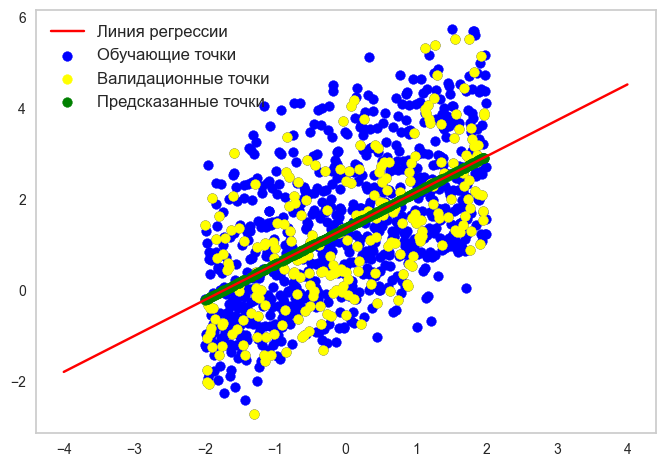

In [11]:
plt.plot([-4, 4],  [a*-4 + b, a*4 + b], color='red', label="Линия регрессии")
plt.scatter(x2, y, color='blue', label='Обучающие точки')
plt.scatter(X2_valid, y2_valid, color='yellow', label='Валидационные точки')
plt.scatter(X2_valid, predictions_valid, color='green', label='Предсказанные точки')


plt.grid()
plt.legend(fontsize=12, loc='best')

И был построен график. По виду графика можно заметить, что "направление" которое было получено по предсказанию совпадает с "направлением" данных. Одноко данные находятся на большом удалении друг от друга, что и не дает точного предсказания.

После этого, анналгично с первым случаем был построен график остатков

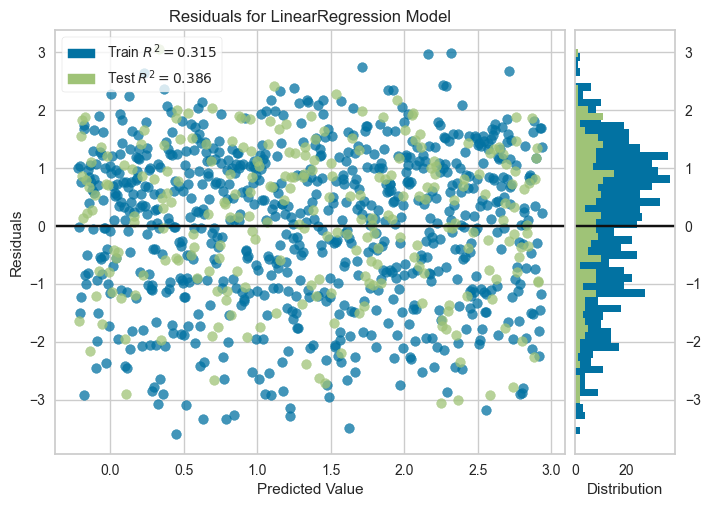

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [12]:
visualizer = ResidualsPlot(model)

visualizer.fit(np.array(X2_train).reshape(-1,1), y2_train)  # обучающие данные
visualizer.score(np.array(X2_valid).reshape(-1,1), y2_valid) # Оценка модели по тестовым данных
visualizer.show()                 # Визуализация

По графику остатков можно заметить, что в тренировочных данных предсказанное значение чаще оказалось чуть больше, чем реальное, об этом говорит концентрация точек около значения 1. Но в тестовых же данных ситуация кажется довольно близкой к симметрии. Что говорит о хорошем состоянии предсказания.

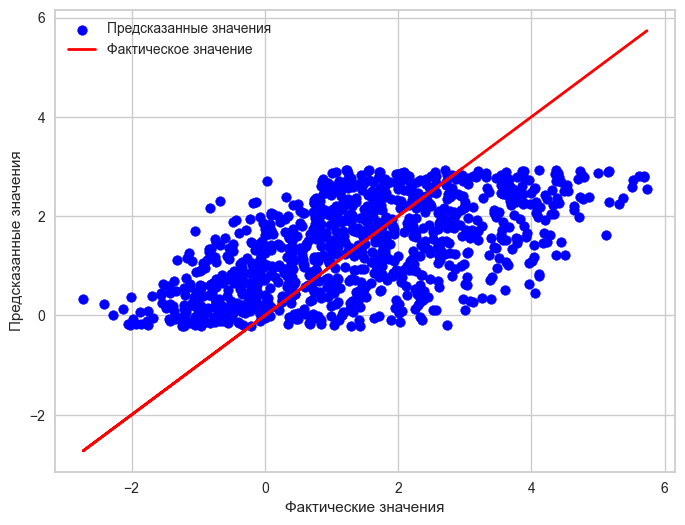

In [13]:
dpredictions_valid = model.predict(np.array(x2).reshape(-1,1))
plt.figure(figsize=(8, 6))
plt.scatter(y, dpredictions_valid, color='blue', label='Предсказанные значения')

plt.plot(y, y,  color='red', lw=2, label='Фактическое значение')

plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.legend(loc='upper left')

plt.show()

По данному графику можно заметить, что предсказанные значения практически равномерно распределеились по обе стороны от предсказанных

### Вывод по 1-ой Части

Хоть данное предсказание и далеко от идеального, все же можно приблизительно понять "направление" зависимости и на основе этого сделать некоторые выводы, возможно есть факторы, которые тоже создают отклонения и на основе них можно будет построить более удачную модель. Предсказания же по первой модели никак не могут быть описаны линейной регрессией, это видно и по графикам и по метрике R2

---


## Часть 2
## Полиномиальная регрессия
Для третьей часть работы необходимо ввести новый набор данных. Условия взяты для 4ого варианта. Было принято решение взять первый набор, потому что при оторажении на графике зависимость визуально напоминает параболу, а данная кривая описывается полиномом второго порядка


 Для этого создадим два массива с значениями.


In [14]:
x = np.array(df['x1'])
y = np.array(df['y'])

### Степень 2
В `sklearn` есть `Polynomial Features` преобразователь, который преобразует матрицу входных данных в новую матрицу данных заданной степени. Для обучения модели была выбрана степень 2. По данным, которые были визуально представлены в первой части работы, можно предположить, что необходим полином второй степени

In [15]:
from sklearn.preprocessing import PolynomialFeatures


poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(np.array(x).reshape(-1,1))

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
y_pred = lin_reg.predict(X_poly)
y_pred

array([3.79280103e+00, 9.49687331e-02, 5.03288496e-01, 4.12324588e-04,
       2.80082190e+00, 6.10872512e-02, 4.86562557e-01, 5.82097133e-01,
       9.65395908e-01, 3.89548968e+00, 1.55179280e+00, 2.99936377e-01,
       1.64601871e+00, 2.74757143e-01, 9.19762922e-01, 3.40199695e+00,
       4.02237269e+00, 4.48706117e-01, 9.76004922e-01, 1.88520417e+00,
       1.47592316e-02, 1.31334506e-01, 1.13649353e+00, 3.79175898e-01,
       3.49938840e+00, 3.19752420e-02, 3.02934682e-02, 2.21658248e+00,
       1.15796896e-01, 2.03186926e+00, 2.80686841e-01, 1.44326277e+00,
       2.89349715e+00, 1.78738613e+00, 1.21955632e+00, 2.16957459e+00,
       3.34303720e+00, 6.07753741e-01, 3.95101782e-02, 3.71595093e+00,
       3.28515550e+00, 2.05714244e+00, 2.82830168e+00, 4.89997000e-01,
       2.42361538e+00, 4.05356318e+00, 9.32252721e-02, 1.77903988e-02,
       2.32219641e-01, 3.56432861e+00, 7.74329830e-01, 2.26579771e+00,
       5.46799149e-02, 7.51963667e-01, 3.18716002e+00, 4.17994697e-01,
      

Для данной модели были подсчитаны значения метрик MAE и R2.


In [16]:
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 0.9115776638698979
R-squared (R²): 0.541784582304522


При первой попытке отображения была получена "прыгающая" линия, потому что данные были неотсортированы, так что были созданы отсортированные знчения по индексам. И уже по ним было выполнено предсказание

In [17]:
# Сортируем данные по x для гладкой линии
sorted_indices = np.argsort(x)
x_sorted = np.array(x)[sorted_indices]
y_sorted = np.array(y)[sorted_indices]

# Предсказываем для отсортированных данных
X_poly_sorted = poly_features.transform(x_sorted.reshape(-1,1))
y_pred_sorted = lin_reg.predict(X_poly_sorted)

После чего было выполнено построение графика, на котором изображены линия регрессии (красным цветом) и точки регрессии (синим цветом).

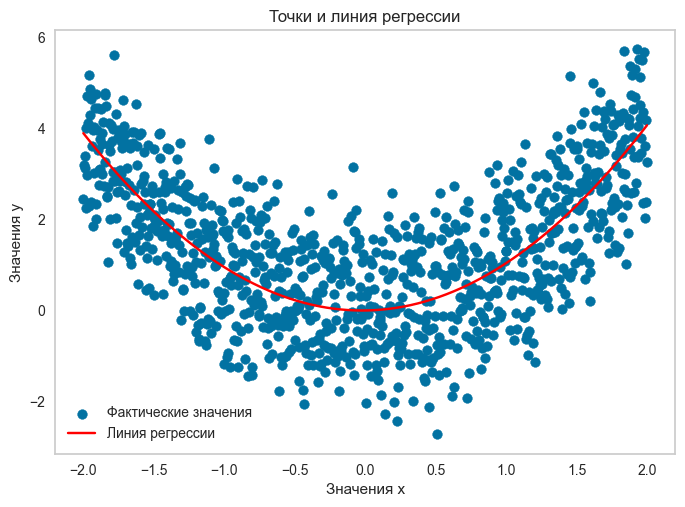

In [18]:
# Строим график
plt.scatter(x, y, label='Фактические значения')
plt.plot(x_sorted, y_pred_sorted, color='red', label="Линия регрессии")
plt.grid()
plt.legend()
plt.title("Точки и линия регрессии")
plt.xlabel("Значения x")
plt.ylabel("Значения y")
plt.show()

### Степень 4
Аналогичные действия были произведены для степени 4

Mean Absolute Error (MAE): 0.9113749540010714
R-squared (R²): 0.54208276516143


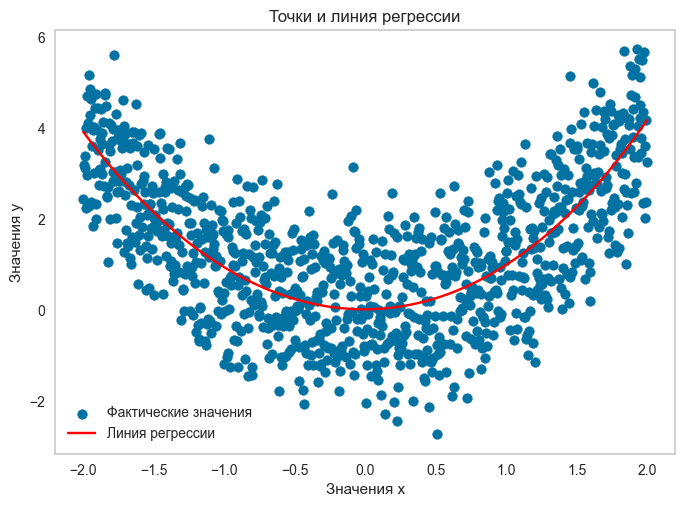

In [19]:
poly_features = PolynomialFeatures(degree=4)
X_poly = poly_features.fit_transform(np.array(x).reshape(-1,1))

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
y_pred = lin_reg.predict(X_poly)

mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)

# Сортируем данные по x для гладкой линии
sorted_indices = np.argsort(x)
x_sorted = np.array(x)[sorted_indices]
y_sorted = np.array(y)[sorted_indices]

# Предсказываем для отсортированных данных
X_poly_sorted = poly_features.transform(x_sorted.reshape(-1,1))
y_pred_sorted = lin_reg.predict(X_poly_sorted)

# Строим график
plt.scatter(x, y, label='Фактические значения')
plt.plot(x_sorted, y_pred_sorted, color='red', label="Линия регрессии")
plt.grid()
plt.legend()
plt.title("Точки и линия регрессии")
plt.xlabel("Значения x")
plt.ylabel("Значения y")
plt.show()

### Степень 6
И для степени 6

Mean Absolute Error (MAE): 0.9114257072721229
R-squared (R²): 0.542777319393311


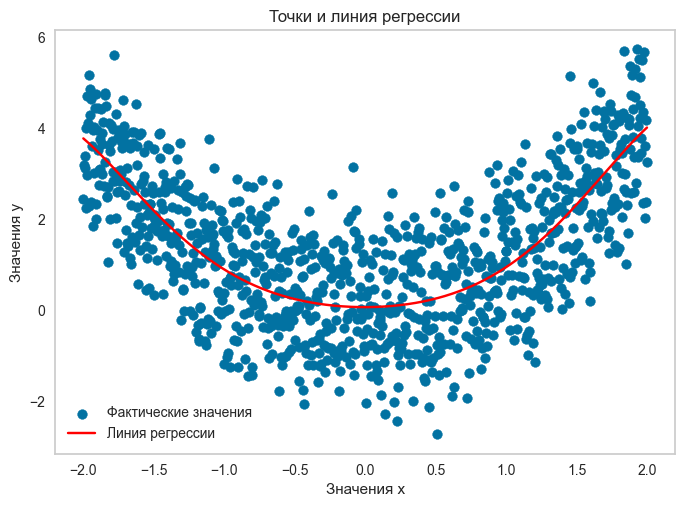

In [20]:
poly_features = PolynomialFeatures(degree=6)
X_poly = poly_features.fit_transform(np.array(x).reshape(-1,1))

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
y_pred = lin_reg.predict(X_poly)

mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)

# Сортируем данные по x для гладкой линии
sorted_indices = np.argsort(x)
x_sorted = np.array(x)[sorted_indices]
y_sorted = np.array(y)[sorted_indices]

# Предсказываем для отсортированных данных
X_poly_sorted = poly_features.transform(x_sorted.reshape(-1,1))
y_pred_sorted = lin_reg.predict(X_poly_sorted)

# Строим график
plt.scatter(x, y, label='Фактические значения')
plt.plot(x_sorted, y_pred_sorted, color='red', label="Линия регрессии")
plt.grid()
plt.legend()
plt.title("Точки и линия регрессии")
plt.xlabel("Значения x")
plt.ylabel("Значения y")
plt.show()

### Выводы по 2-ой Части
Стоит отметить, что чем больше степень полинома, которым задается регрессия, тем ближе предсказанные значения были к тренировочным данным. Однако можно заметить, что с увелечение степени полинома будет также увеличиваться и время обработки значений и высислений, для 6ой степени метрика R2 показала значения близкие к 0.5427, что означает наличие отклонения в 0.4573. Это говори о неплохом предсказании, но все же наличие отклонений является заметным визуально, а также численно. Это связано с большим рассеянием точек на малом интервале.

---

## Часть 3 
## Решение задачи регрессии различными методами

Для началы работы с фалом необходимо его загрузить и ознакомиться с данными. Для ознакомления сразу были выбраны числовые столбцы.

In [21]:
import seaborn as sns

df = pd.read_csv('salary3.csv')

df.describe()

,age,income,experience,score_test,hours_worked,distance_to_work,savings,debt,salary
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,43.732000,50493.562171,19.479333,74.649867,49.046000,10.169171,19920.723043,7656.749308,98573.093521
std,15.071771,15354.495706,11.471529,9.904426,17.053654,10.003094,13635.530107,5481.390395,111786.756001
min,18.000000,-826.421240,0.000000,41.604998,20.000000,0.018137,408.482014,4.367130,28588.984258
25%,31.000000,40525.989722,10.000000,67.776127,34.000000,3.022163,9418.707911,3138.484219,69582.654903
50%,44.000000,50784.690569,19.000000,74.701567,49.000000,7.105165,17114.512522,6786.703775,80310.412797
75%,56.000000,61104.997961,29.000000,81.635633,63.000000,14.392065,27766.214001,11008.309571,91637.052601
max,69.000000,98819.709397,39.000000,107.261317,79.000000,82.597342,101890.570518,27276.705593,985625.114794


В процессе выполнения было замечено, что есть записи у которых зарплата (целевая переменная на порядки превышает общие значения. (можно заметить, что максимальное значение превышает 75% почти в 10 раз). такие значения необходимо убрать

In [22]:

# Вычисляем 75-й процентиль зарплаты
percentile_75 = df['salary'].quantile(0.75)

# Вычисляем пороговое значение (2 * 75%)
threshold = 2 * percentile_75

print(f"75-й процентиль зарплаты: {percentile_75:.2f}")
print(f"Пороговое значение (2 * 75%): {threshold:.2f}")

# Фильтруем данные, оставляя только строки с зарплатой <= пороговому значению
df_filtered = df[df['salary'] <= threshold]

print(f"Исходный размер датасета: {df.shape}")
print(f"Размер датасета после фильтрации: {df_filtered.shape}")
print(f"Удалено записей: {df.shape[0] - df_filtered.shape[0]}")

df_filtered.describe()
df = df_filtered

75-й процентиль зарплаты: 91637.05
Пороговое значение (2 * 75%): 183274.11
Исходный размер датасета: (1500, 15)
Размер датасета после фильтрации: (1455, 15)
Удалено записей: 45


В качестве целевой переменной была выбрана зарплата, потому как данный парметр является денежным эквивалентом качества выполнеямой работы. При трудоустройстве соискатель выбирает работу по зарплатным ожиданиям. Работадателю же необходимо оценить насколько работник заслуживает заработную плату данного достоинства.

Для целевой переменной была построена гистограмма, которая показывает частоту повяления данной зарплаты в дата сете.

Text(0, 0.5, 'Частота')

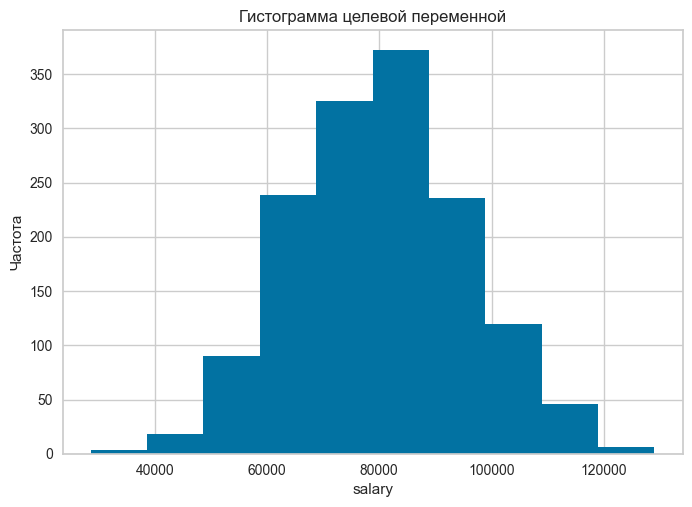

In [23]:
plt.hist(df['salary'])
plt.title('Гистограмма целевой переменной')
plt.xlabel('salary')
plt.ylabel('Частота')

Также был построен boxplot

Text(0.5, 1.0, 'Boxplot целевой переменной')

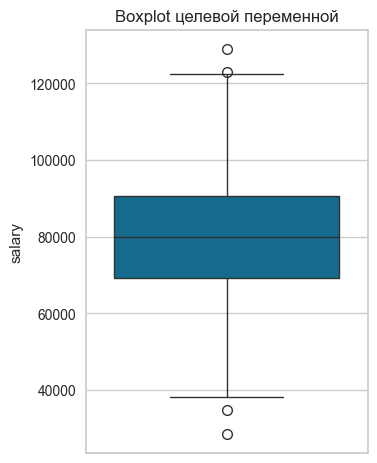

In [24]:
plt.subplot(1, 2, 2)
sns.boxplot(df['salary'])
plt.title(f'Boxplot целевой переменной')

После чего была построена диаграмма рассеяния, куда были выбраны столбцы, который по предположению влияют на формирование зарплаты сотрудника

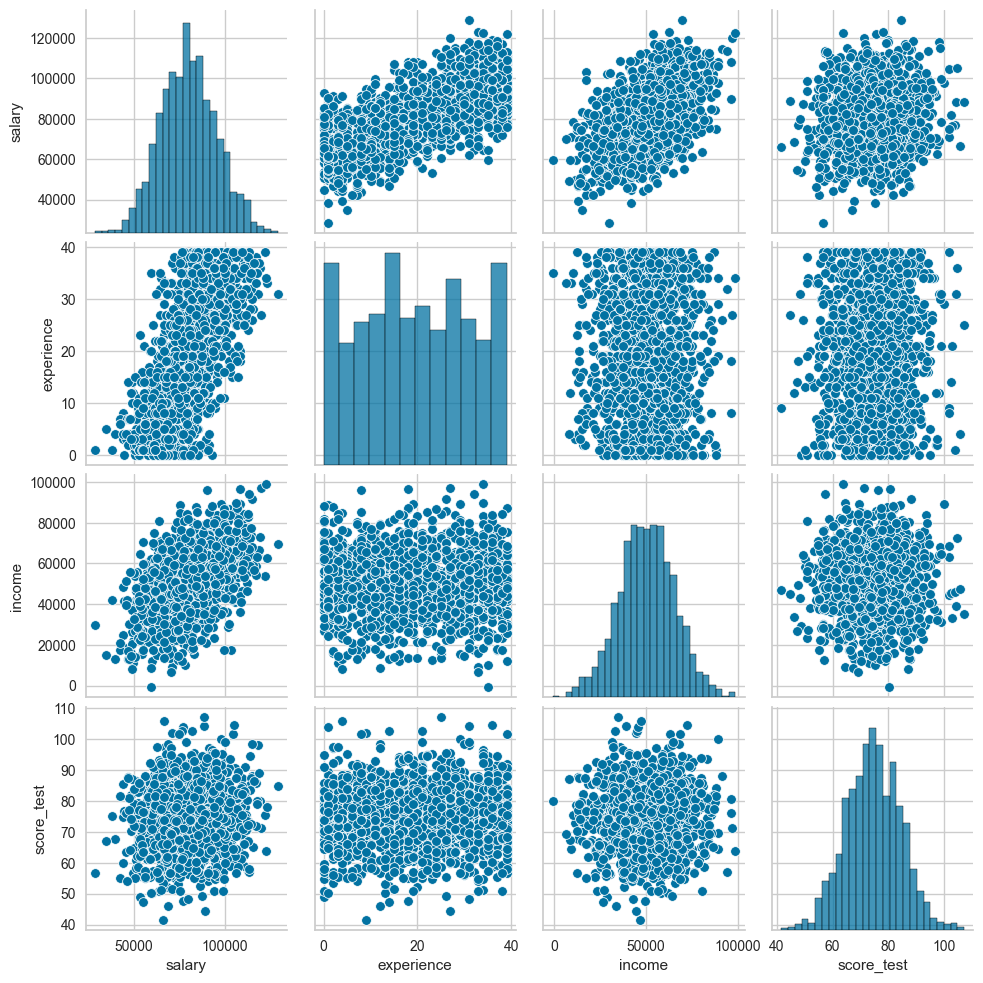

In [25]:
sns.pairplot(df[['salary', 'experience', 'income', 'score_test']])

На основе диаграммы рассеяния можно сделать предположение о наличии линейной зависимости зарплаты сотрудника от профессионального опыта. А также о наличии линейной зависимости зарплаты сотрудника от годового дохода до текущей работы. Также можно заметить другие зависимости, но они не касаются целевой переменной, так что они не так интересны.

Для дальнейшие работы необходимо составить датасет из числовых столбцов заданного датасета. После чего полученный набор данных необходимо разбить на тренировочный и валидоационный.

In [26]:
df_ch = df[[ 'experience', 'income', 'score_test', 'age', 'distance_to_work', 'savings', 'debt']]
df_ch

,experience,income,score_test,age,distance_to_work,savings,debt
0,25,70201.189680,87.559729,56,3.708690,25987.334048,2556.821627
1,39,51901.897395,70.808381,69,7.082793,22134.899021,725.180513
2,4,38605.409293,63.324996,46,5.129154,47106.068408,12659.359583
3,20,49949.736955,78.215505,32,19.315623,15868.328813,12369.776003
4,13,48965.290095,74.429096,60,5.654904,15734.633332,4792.095213
...,...,...,...,...,...,...,...
1495,23,38575.311408,73.472554,40,1.334398,29752.262685,3364.903087
1496,26,47273.370862,67.306390,54,0.270390,38268.338538,13554.584962
1497,1,52600.121356,76.485862,28,0.125034,23163.373051,16976.656770
1498,30,63187.644522,73.859839,23,21.186851,31465.493014,8781.391132


Как и в первой части тренировочная выборка получена с помощью функции train_test_split. Количество валидационных данных равняется 25% от всех данных. Для надежности данные были пермешаны 10 раз.

In [27]:
x = df_ch
y = df['salary']

X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size=0.25, random_state=10)

Учитывая, что параметров много, а значения параметров отличиаются друг от друга необходимо применить стандартизацию, посредством StandartScaler.

In [28]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)

Затем было произведено обучение модели линейной регрессии. И получены предсказанные значения при помощи метода `predict()`.

In [29]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_valid)

**После** чего был осуществлен подбор оптимальных параметров с помощью `GridSearchCV`

In [30]:
from sklearn.model_selection import GridSearchCV

param_grid = {'fit_intercept': [True, False], 'positive': [True, False]}

grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Лучшие параметры:", best_params)

Лучшие параметры: {'fit_intercept': True, 'positive': True}


В резултате проверки были получены наилучшие параметры. В данном случае рекомендуется ограничивать модель только положительными числами, а также `fit_intercept` отвечает за то, нужно ли включать в модель свободный член.

Создадим модель с данными параметрами.

In [31]:
model = LinearRegression()
model.set_params(copy_X=True, fit_intercept=True, n_jobs=0, positive=True)
model.fit(X_train, y_train)

y_pred = model.predict(X_valid)

После создания модели необходимо оценить её качество с помощью метрик. В качестве метрик были выбраны MAE, MSE, RMSE, R2.

In [32]:
print("Mean Squared Error (MSE):", mean_squared_error(y_valid, y_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_valid, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_valid, y_pred)))
print("R-squared (R²):", r2_score(y_valid, y_pred))

Mean Squared Error (MSE): 75458544.54061055
Mean Absolute Error (MAE): 6622.615980928912
Root Mean Squared Error (RMSE): 8686.687777318266
R-squared (R²): 0.6733637222809514


Полученные данные говорят о хорошей работе модели. Параметр R2 превышает 65%, что означает, что 2/3 части значений описываются моделью. Также можно заметить довольно большие показатели MSE, но данный параметр не ограничен сверху, поэтому с ростом количества значений может расти и значение метрики.

После этого необходимо создать датафрейм с истинными и предсказанными значениями.

In [33]:
df_rez = pd.DataFrame({'True Values': y_valid, 'Predicted Values': y_pred}).reset_index(drop=True)
df_rez

,True Values,Predicted Values
0,87599.149577,75179.617169
1,91618.407913,76129.467817
2,84929.309389,76182.873198
3,99340.084024,78707.688354
4,84645.406331,69625.798066
...,...,...
359,82865.637846,72692.792854
360,99561.687106,99397.559394
361,81730.505001,69788.412031
362,70722.501054,74163.576264


Данный датафрейм показывает, что некоторые предсказанные значения довольно близки к реальным, а некоторые значительно отличаются. Данное являение показывает, что модель все же не до конца правильно различиает значения. Этим и были обусловлено значение метрики R2 равное 0.67

Создан датафрейм с признаками и значением коэффициентов для каждого признака.

In [34]:
df_coef = pd.DataFrame({'Feature': df_ch.columns, 'Coefficient': model.coef_})
df_coef

,Feature,Coefficient
0,experience,10275.856239
1,income,7619.438203
2,score_test,1100.102753
3,age,280.553445
4,distance_to_work,0.000000
5,savings,156.148464
6,debt,0.000000


По данным значениям можно заметить, что наибольшую зависимость зарплата сотрудника имеет от опыта и годового дохода с прошлой работы. Также можно заметить, что зарплата практически никак не зависит линейно от дистанции до работы, а также от количества сбережений в банке.

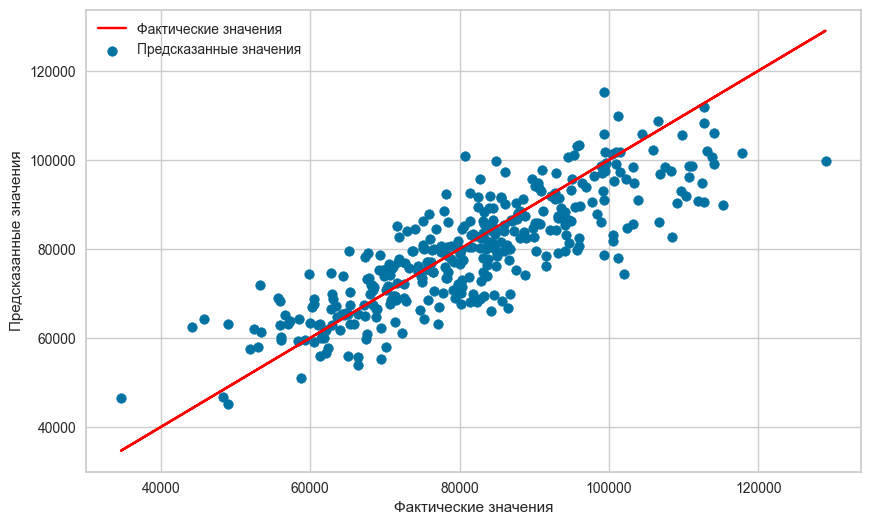

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(y_valid, y_valid, color='red', label = 'Фактические значения')
plt.scatter(y_valid, y_pred, label = 'Предсказанные значения')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.legend()

plt.show()

По данной модели были на графике отображены фактические и предсказанные значения. Можно заметить, что отклонения в меньшую сторону визуально заметны больше, возможно это является причиной уходшения точности предсказания.

Так же регрессия была реализована методом k-ближайших соседей и деревом решений. Для этого использовались функции KNeighborsRegressor и DecisionTreeRegressor.

В параметрах модели kближайщих соседей указывались различные параметры, одним из которых был параметр просматриваемых соседей. В данном случае количество соседей было установлено в 10.

In [36]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=10)

knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_valid)


print("Mean Squared Error (MSE):", mean_squared_error(y_valid, y_pred_knn))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_valid, y_pred_knn))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_valid, y_pred_knn)))
print("R-squared (R²):", r2_score(y_valid, y_pred_knn))

Mean Squared Error (MSE): 90993085.63142864
Mean Absolute Error (MAE): 7394.535595121564
Root Mean Squared Error (RMSE): 9539.02959589856
R-squared (R²): 0.6061195856643538


Полученные метрики показали, что полученная модель чуть хуже предсказывала значения. Это можно заметить по значению метрики R2, которая в данной метрике уменьшилась до 60%, в отличие от предыдущей.

Второй моделью была выбрана модель дерева решений. В нем предсказывание значения основывалась на различных параметрах, полученных из файла с данными.

In [37]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(max_depth=5)

tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_valid)


print("Mean Squared Error (MSE):", mean_squared_error(y_valid, y_pred_tree))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_valid, y_pred_tree))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_valid, y_pred_tree)))
print("R-squared (R²):", r2_score(y_valid, y_pred_tree))

Mean Squared Error (MSE): 97832288.30421884
Mean Absolute Error (MAE): 7778.026848085803
Root Mean Squared Error (RMSE): 9891.020589616566
R-squared (R²): 0.5765148309317192


Данная модель показала результа значительно хуже предыдущих двух по метрикам, можно замеить, что метрика R2 не достает даже до 60%, что свидетельсвтует о плохом предсказании модели.

Для сравнения обе модели были отображены на графике, для удобства визуального сравнения.

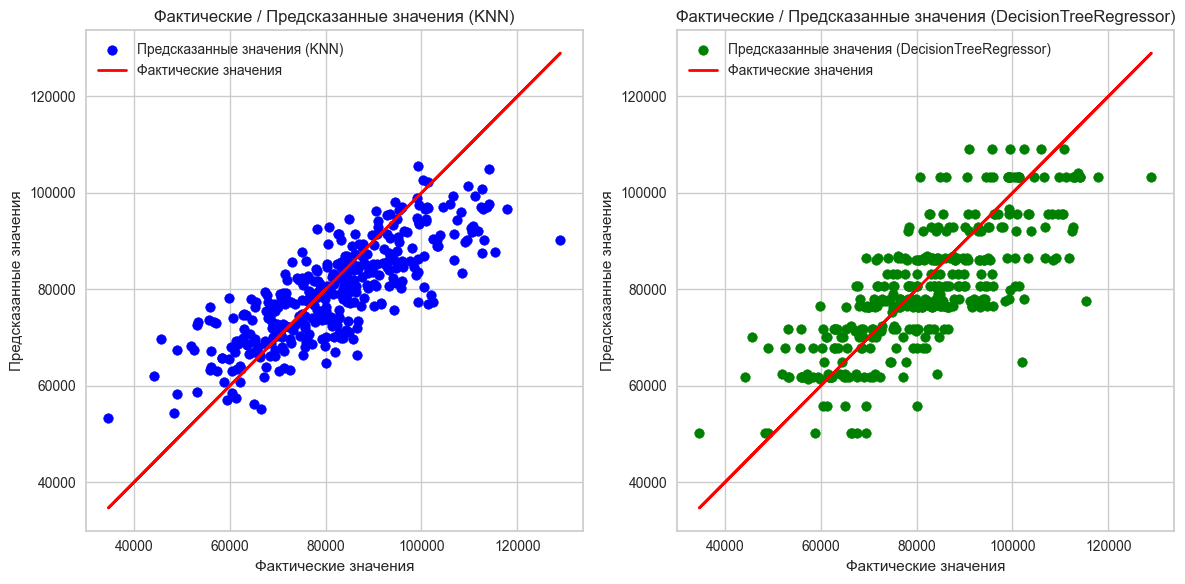

MAE (KNN): 7394.535595121564
R2 (KNN): 0.6061195856643538
MAE (DecisionTreeRegressor): 7778.026848085803
R2 (DecisionTreeRegressor): 0.5765148309317192


In [38]:
mae_knn = mean_absolute_error(y_valid, y_pred_knn)
r2_knn = r2_score(y_valid, y_pred_knn)

mae_tree = mean_absolute_error(y_valid, y_pred_tree)
r2_tree = r2_score(y_valid, y_pred_tree)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_valid, y_pred_knn, color='blue', label='Предсказанные значения (KNN)')
plt.plot(y_valid, y_valid,  color='red', lw=2, label='Фактические значения')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Фактические / Предсказанные значения (KNN)')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_valid, y_pred_tree, color='green', label='Предсказанные значения (DecisionTreeRegressor)')
plt.plot(y_valid, y_valid,  color='red', lw=2, label='Фактические значения')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Фактические / Предсказанные значения (DecisionTreeRegressor)')
plt.legend()

plt.tight_layout()
plt.show()

print("MAE (KNN):", mae_knn)
print("R2 (KNN):", r2_knn)
print("MAE (DecisionTreeRegressor):", mae_tree)
print("R2 (DecisionTreeRegressor):", r2_tree)

Ориентируясь на график можно заметить, что последняя модель хуже той, с которой идет сравнение. Даже визуально заметно, что на левом рисунке нет таких больлших отличий предсказанных значений от фактических

---

## **Вывод**
В ходе выполнения лабораторной работы были освоены ключевые аспекты работы с различными видами регрессии. Были изучены основные принципы построения модели, включая деление датасета на тренировочную и валидационную выборки, обучение модели, вычисление метрик (R2, MAE) и визуализация результатов. Также была оценена зависимость от нескольких факторов и произведена визуализация результатов, включая график разницы между фактическими и предсказанными значениями. Была продемонстрирована зависимость качества регрессии от степени полинома и проведена работа с реальными данными, что позволило выделить важные и не влияющие на результат параметры. Полученные навыки могут быть полезны в различных областях, где требуется анализ и предсказание зависимостей в данных.
Для последней части работы были построены три различные модели, лучшей из всех трех оказалась модель линейной регрессии. Она как визуально кажется ближе к реальным значениям, так и по метрике R2 данная модель показала себя лучше остальных.